# コンピュータとプログラミング
> 　毎日決まった時間帯に発生する交通渋滞を解消するための方策を動的モデルかつ確率的モデルの**シミュレーションにより検討し、結果を分析**していく問題。（ [共通テスト「情報Ⅰ」試作問題](https://www.ipsj.or.jp/education/9faeag0000012a50-att/sanko2.pdf#page=12) ）

## 問題文
　次の文章を読み，空欄 **[ ア ]** ～ **[ ウ ]** に入れる最も適当なものを，後のそれぞれの解答群のうちから一つずつ選べ。

　Aさんの学校の近くにある国道と県道が交差する交差点では，朝の通勤時間帯（8:00～8:30）に県道でひどい渋滞が発生する。A さんは学校の課題研究で，この交通渋滞を緩和できないか現状を調査し，シミュレーションしてみることにした。<br>
　まず，現状の交通量や信号の時間などを調査したところ，次のようなことが分かった。なお，渋滞するのは矢印の進行方向のみであり，反対の進行方向は考えないものとする。
- 青信号の時，10 秒間に片側２車線の国道は 20 台の車が交差点を通過でき，片側１車線の県道は 10 台の車が交差点を通過できるが，それを超える台数は通過できない（信号待ち）。
- 国道は 60 秒間の青信号と 30 秒間の赤信号が交互に変わり，県道の信号はその逆となる。
- 10 秒間に交差点（信号待ちしている車がある場合は，その最後尾）に到着する車は国道は 8～12 台，県道は 3～4 台である。

　この現状の条件のもとシミュレーションしてみることにした。ここで，10 秒間に到着する車の台数は乱数で決まることとし，8:00 時点の信号待ちの車は 0 台と仮定する。

　Aさんは，現状の条件のうち，到着台数を変えずに **[ ア ]** したところ図のようになった。この結果から，現状の条件と比べ **[ イ ]** と **[ ウ ]** が分かった。そこで，A さんは地元警察に **[ ア ]** することを提案した。

[　ア　]の解答群
0. 国道の青信号の時間を 50 秒，赤信号を 50 秒に変更
1. 国道の青信号の時間を 70 秒，赤信号を 50 秒に変更
2. 国道の青信号の時間を 70 秒，赤信号を 60 秒に変更
3. 国道の青信号の時間を 50 秒，赤信号を 40 秒に変更

[　イ　]・[　ウ　]の解答群
0. 県道において 8:00～8:30 の 30 分間に交差点を通過した車の台数は変わらないこと
1. 国道において 8:00～8:30 の 30 分間に交差点を通過した車の台数は増えていること
2. 信号の切り替わりの時点において，国道と県道合わせて渋滞している車の最大台数があまり変わらないこと
3. 信号の切り替わりの時点において，国道と県道合わせて渋滞している車の最大台数が少なくなること
4. 県道だけでなく国道の交差点での混み具合も改善されたこと
5. 国道・県道共に交差点にさしかかる車は青信号であればおおよそ通過できること


## 図１　交差点到着台数（横軸：秒）
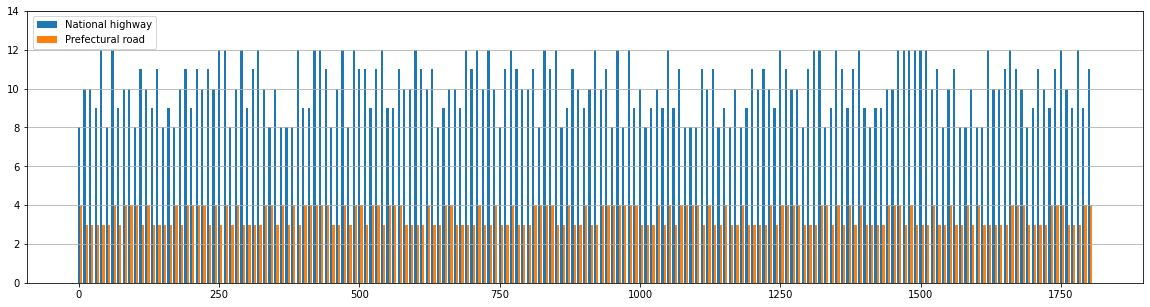

## 図２　シミュレーション結果（横軸：秒、縦軸：渋滞台数）
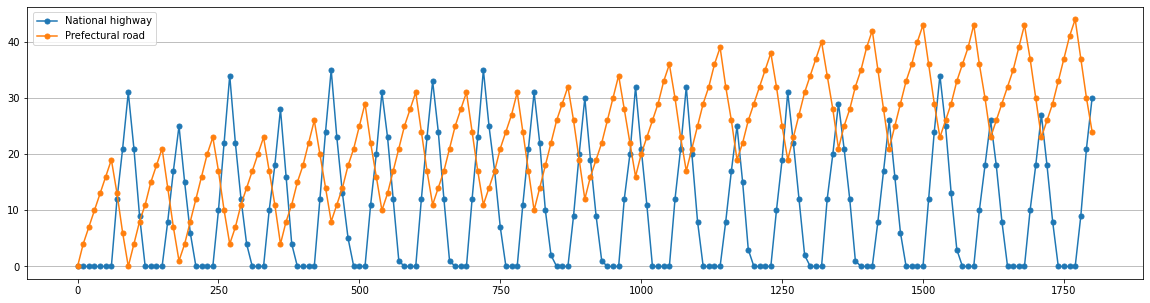

## 図３　条件を変えたシミュレーション結果（横軸：秒、縦軸：渋滞台数）
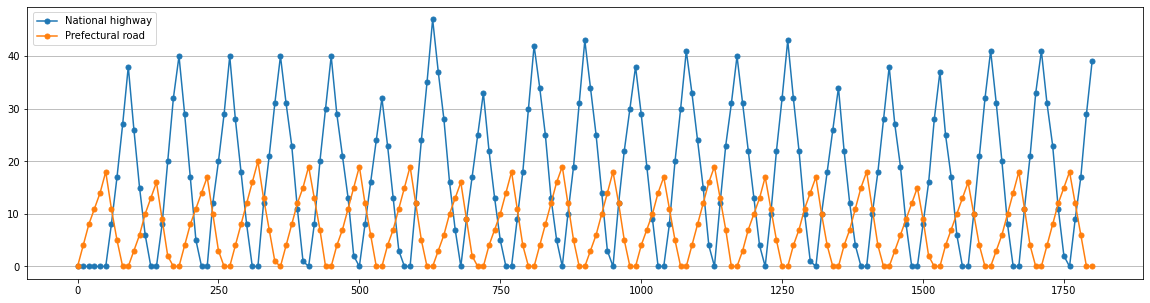

# シミュレーション用プログラム
- 実効後、スライダーを動かして確かめてみよう
- 国道と県道を合わせて最も渋滞台数が少なくなるのは赤信号と青信号の時間が何秒のときかな？

In [5]:
%matplotlib inline
import ipywidgets as widgets
import numpy as np
import matplotlib.pyplot as plt

def sub(a,b):
  return a - b if a - b > 0 else 0

def f( blu, red ):
  timeBlu, timeRed = blu//10, red//10
  timeCycle = timeBlu + timeRed
  numTrafficA, numTrafficB = [0], [0]
  elapsedTime = np.array( range( 0, 1801, 10 ) )
  numArrivalsA = np.random.randint( 8, 13, 181 )
  numArrivalsB = np.random.randint( 3, 5, 181 )
  i = 0
  while i <= 179 :
    numTrafficA.append( numTrafficA[i] + numArrivalsA[i] )
    numTrafficB.append( numTrafficB[i] + numArrivalsB[i] )
    if i % timeCycle < timeBlu :
      numTrafficA[i+1] = sub( numTrafficA[i+1], 20 )
    else :
      numTrafficB[i+1] = sub( numTrafficB[i+1], 10 )
    i=i+1
  print( "国道渋滞　最大台数：", np.amax(numTrafficA), "平均台数：{:.2f}".format( np.average( numTrafficA ) ) )
  print( "県道渋滞　最大台数：", np.amax(numTrafficB), "平均台数：{:.2f}".format( np.average( numTrafficB ) ) )
  plt.figure( figsize=( 20, 5 ) )
  plt.bar(elapsedTime, numArrivalsA, 4, label="National highway" )
  plt.bar(elapsedTime+4, numArrivalsB, 4, label="Prefectural road" )
  plt.yticks(range(0,15,2), range(0,15,2))
  plt.grid(axis="y")
  plt.legend(bbox_to_anchor=(0.12, 0, 0, 1))
  plt.show()
  plt.figure( figsize=( 20, 5 ) )
  plt.plot( elapsedTime, numTrafficA , "o-", ms=5, label="National highway" )
  plt.plot( elapsedTime, numTrafficB , "o-", ms=5, label="Prefectural road" )
  plt.grid(axis="y")
  plt.legend(bbox_to_anchor=(0.12, 0, 0, 1))
  plt.show()

signalBlu = widgets.IntSlider( value=60, min=10, max=100, step=10, description="青信号点灯時間（秒）:" )
signalRed = widgets.IntSlider( value=30, min=10, max=100, step=10, description="赤信号点灯時間（秒）:" )
widgets.interact( f, blu=signalBlu, red=signalRed )

interactive(children=(IntSlider(value=60, description='青信号点灯時間（秒）:', min=10, step=10), IntSlider(value=30, des…

<function __main__.f>